#Setup & Dependencies

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [0]:

#Mount folder to save and retrieve outputs
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive"

Mounted at /content/drive
/content/drive/My Drive


#Import Data and Discovery

In [0]:

df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()

df_full.to_csv('JPM.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded


In [0]:
df_full.shape

(428, 7)

In [0]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,107.629997,108.019997,106.809998,107.949997,103.156837,13578800
1,2018-01-03,107.860001,108.489998,107.480003,108.059998,103.261963,11901000
2,2018-01-04,108.360001,110.029999,108.199997,109.040001,104.741249,12953700
3,2018-01-05,109.260002,109.550003,107.779999,108.339996,104.068840,14155000
4,2018-01-08,108.150002,108.680000,107.699997,108.500000,104.222534,12466500


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,109.724533,110.687570,108.758645,109.716262,107.317191,1.400274e+07
std,5.015678,4.944262,5.097402,5.032704,4.888054,5.126782e+06
min,92.690002,94.220001,91.110001,92.139999,90.066071,6.488400e+06
25%,106.430000,107.359999,105.170000,106.360001,103.943152,1.036032e+07
50%,110.065003,111.089996,109.005001,110.049999,107.718700,1.303090e+07
75%,113.834999,114.699997,113.112501,113.900002,110.902843,1.608898e+07
max,119.129997,120.400002,118.750000,120.230003,120.230003,4.131390e+07


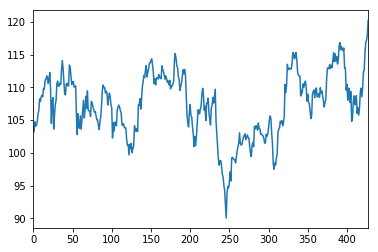

In [0]:

df_full["Adj Close"].plot()

# Data Preproccessing


In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
y_test.shape

(80,)

#Modeling

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

## Baseline

In [0]:
y_pred_lag=np.roll(y_test,1)

In [0]:
get_performance(y_pred_lag)

Mean Absolute Error: 1.2771
Mean Squared Error: 3.4519
Root Mean Squared Error: 1.8579


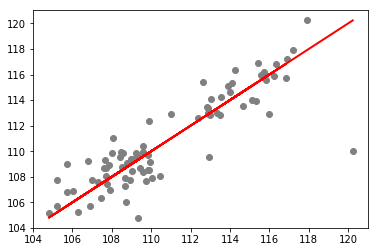

In [0]:
get_plot(y_pred_lag)

## Linear Regression

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 1.1876
Mean Squared Error: 2.1871
Root Mean Squared Error: 1.4789


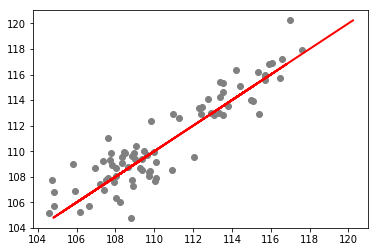

In [0]:
get_plot(y_pred_lr)

In [0]:
get_performance(y_pred_lr)

Mean Absolute Error: 1.1876
Mean Squared Error: 2.1871
Root Mean Squared Error: 1.4789


## Ridge Regression

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [0]:
get_performance(y_pred_ridge)

Mean Absolute Error: 1.1868
Mean Squared Error: 2.1853
Root Mean Squared Error: 1.4783


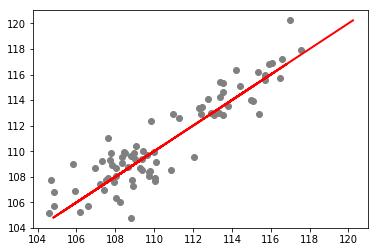

In [0]:
get_plot(y_pred_ridge)

## Gradient Boosting Trees

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [0]:
get_performance(y_pred_gb)

Mean Absolute Error: 1.6782
Mean Squared Error: 4.195
Root Mean Squared Error: 2.0482


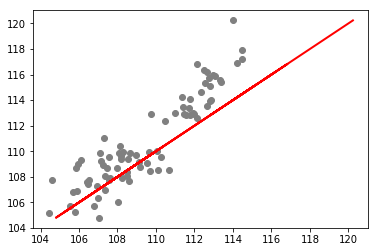

In [0]:
get_plot(y_pred_gb)

# Comparison

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(0, 30)

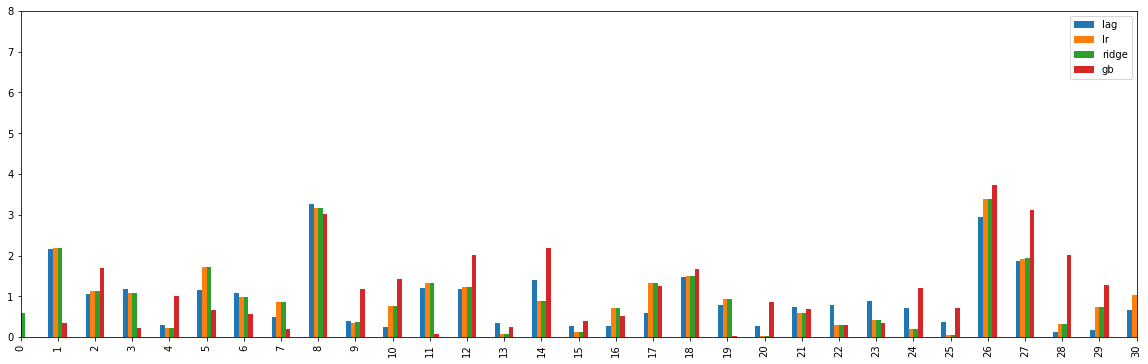

In [0]:
df_comp.plot.bar(figsize=(20, 6))
plt.ylim(0,8)
plt.xlim(0,30)